In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
# url = 'https://github.com/tranghth-lux/data-science-complete-tutorial/blob/master/Data/HR_comma_sep.csv.txt'
# We will be working on Employee Data. This is employee attrition data. The 'left' named column represents exit from the company or not.
# The data consists of categorical & number data. Thus, needs data preprocessing.
# Make use of preprocessing techniques that you have learnt & build model to predict 'left' named column

In [19]:
emp_df = pd.read_csv('HR_emp.csv')

In [32]:
emp_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [21]:
emp_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [30]:
emp_df.shape

(14999, 10)

In [22]:
emp_df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [29]:
emp_df.corr()['left']

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64

<AxesSubplot:>

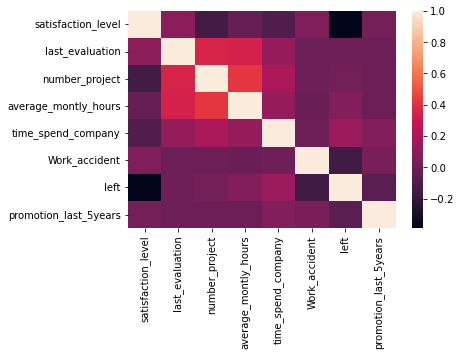

In [28]:
sns.heatmap(emp_df.corr())

In [33]:
emp_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

## Processing numerical columns and categorical columns

In [35]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [49]:
empdf_num = emp_df.select_dtypes(['int64','float64'])

In [50]:
empdf_num.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [51]:
empdf_num.drop('left', axis=1, inplace=True)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
mms = MinMaxScaler()

In [52]:
mms.fit(empdf_num)

MinMaxScaler()

In [55]:
numdata = mms.transform(empdf_num)
numdata

array([[0.31868132, 0.265625  , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.5       , 0.        ,
        0.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.25      , 0.        ,
        0.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.25      , 0.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.125     , 0.        ,
        0.        ]])

In [56]:
numdata.shape

(14999, 7)

In [57]:
## Categorical columns

In [58]:
empdf_cat = emp_df.select_dtypes('object')

In [63]:
empdf_cat.head()

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [65]:
empdf_cat['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [70]:
empdf_cat.rename(columns={'sales':'dept'}, inplace=True)
empdf_cat.head()

,dept,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [73]:
le = LabelEncoder()
le.fit(empdf_cat.dept)
empdf_cat['dept_col'] = le.transform(empdf_cat.dept)
empdf_cat.head()

,dept,salary,dept_col
0,sales,low,7
1,sales,medium,7
2,sales,medium,7
3,sales,low,7
4,sales,low,7


In [80]:
ohe = OneHotEncoder()
ohe.fit(empdf_cat[['dept_col']])
dept_col = ohe.transform(empdf_cat[['dept_col']]).toarray()
dept_col

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [81]:
from sklearn.preprocessing import FunctionTransformer

In [83]:
def fun(x):
    def fun2(y):
        if y == 'low':
            return 1
        elif y == 'medium':
            return 2
        else:
            return 3
    return x.map(fun2)
ft = FunctionTransformer(fun, validate=False)

In [85]:
empdf_cat['salary_col'] = ft.transform(empdf_cat.salary)

In [87]:
empdf_cat.head()

,dept,salary,dept_col,salary_col
0,sales,low,7,1
1,sales,medium,7,2
2,sales,medium,7,2
3,sales,low,7,1
4,sales,low,7,1


## Joining Data

In [120]:
numdata.shape

(14999, 7)

In [127]:
dept_col[:2]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [124]:
#ohe.fit(empdf_cat[['salary_col']])
#salary_col = ohe.transform(empdf_cat[['salary_col']]).toarray()
#salary_col.shape

In [123]:
sal_col = empdf_cat['salary_col'].values.reshape(-1,1)
sal_col.shape

(14999, 1)

In [111]:
X = np.hstack([numdata,dept_col,sal_col])

In [112]:
y = emp_df.left

## Train-Test_Split and Validation

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [117]:
X_train.shape

(11249, 18)

In [119]:
y_train.shape

(11249,)

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [129]:
lr = LogisticRegression()

In [130]:
lr.fit(X_train,y_train)

LogisticRegression()

In [131]:
lr.score(X_test,y_test)

0.7885333333333333

In [133]:
rf = RandomForestClassifier()

In [134]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [135]:
rf.score(X_test,y_test)

0.9928

In [136]:
from sklearn.metrics import precision_score, f1_score, classification_report

In [137]:
pred = rf.predict(X_test)

In [138]:
precision_score(y_pred=pred, y_true=y_test)

0.992018244013683

In [139]:
f1_score(y_pred=pred, y_true=y_test)

0.9847198641765704

In [140]:
print (classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2860
           1       0.99      0.98      0.98       890

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750

